# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


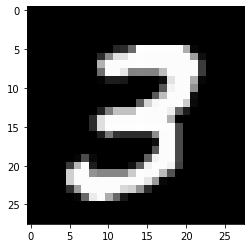

In [81]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[7], cmap='gray')

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [84]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [86]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [87]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 10))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys


In [88]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 10, 10, 10)        650       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 1, 1, 10)          10010     
_________________________________________________________________
flatten_7 (Flatten)          (None, 10)               

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [90]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 10s 173us/step - loss: 0.1673 - acc: 0.9503
Epoch 2/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.0561 - acc: 0.9829
Epoch 3/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.0398 - acc: 0.9879
Epoch 4/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.0311 - acc: 0.9902
Epoch 5/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.0248 - acc: 0.9918
Epoch 6/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.0203 - acc: 0.9938
Epoch 7/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.0174 - acc: 0.9941
Epoch 8/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.0141 - acc: 0.9951
Epoch 9/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0130 - acc: 0.9953
Epoch 10/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.0102 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [92]:
print(score)

[0.030527586654856897, 0.9913]


In [0]:
y_pred = model.predict(X_test)

In [94]:
print(y_pred[:9])
print(y_test[:9])

[[4.19596744e-15 6.49162581e-13 8.59499277e-12 7.05166325e-09
  5.05327744e-15 4.59875031e-13 6.70202250e-21 1.00000000e+00
  8.95135095e-12 2.62937583e-09]
 [7.56209711e-13 2.08204867e-08 1.00000000e+00 5.91173199e-16
  2.13635363e-14 5.54626136e-21 3.06782988e-10 1.61668042e-12
  1.77046867e-13 4.35572763e-17]
 [5.27838953e-11 9.99997139e-01 1.92621130e-07 1.52457821e-11
  7.27665537e-08 1.38577527e-09 2.81637214e-10 2.59357444e-06
  5.85124882e-09 2.03239203e-09]
 [9.99739468e-01 1.09129692e-15 3.19940341e-08 2.75298340e-10
  8.54374696e-11 1.10686580e-08 2.60405301e-04 1.24978428e-09
  8.24493185e-08 1.87935107e-08]
 [1.16070754e-13 7.27441924e-14 3.35876075e-12 5.52440445e-14
  9.99999881e-01 3.15185449e-15 3.23922649e-08 6.78656567e-12
  3.40151934e-11 1.07823666e-07]
 [3.99673307e-12 9.99970198e-01 1.38962298e-06 4.58860346e-11
  5.38723839e-08 1.46393106e-11 1.42802393e-11 2.83579193e-05
  8.32815683e-09 1.81532105e-08]
 [4.08317844e-16 2.09903414e-10 4.13986712e-09 5.42197860e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

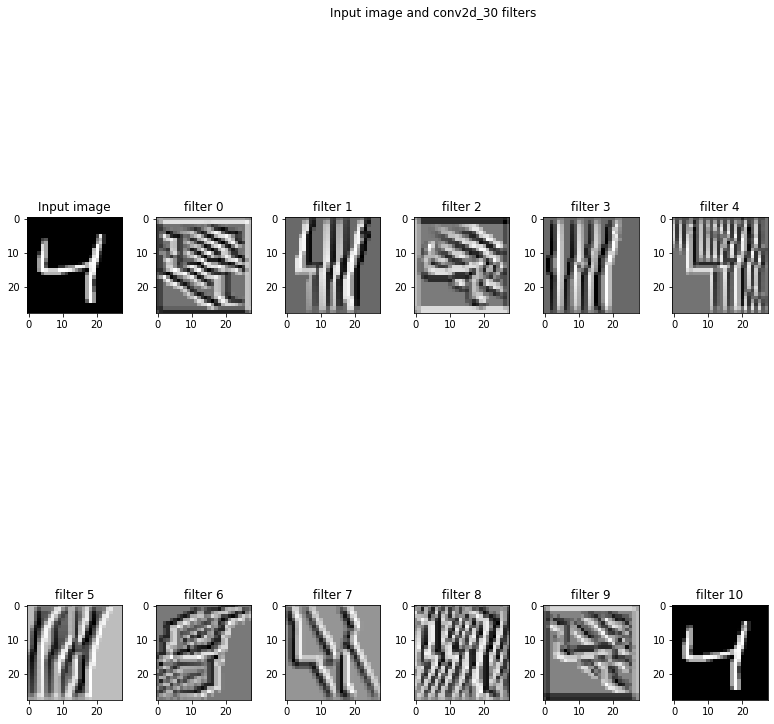

In [97]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_30'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()